In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [3]:
def exploracion_general(df):
    print(f'Este DataFrame contiene {df.shape} filas y columnas')
    print(f'Las columnas y tipos correspondientes son los siguientes: \n{df.dtypes}')

Fase 1. Exploración y limpieza.

In [4]:
df_cfa=pd.read_csv("customer_flight_activity.csv")

In [5]:
df_clh=pd.read_csv("customer_loyalty_history.csv")

Leemos los dos CSV's.

Primero exploramos el CSV Customer Flight Analysis

In [6]:
df_cfa.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


Las siguientes funciones nos indican que el CSV "Customer Flight Activity" cuenta con un total de 405624 filas y 10 columnas.
Ninguna fila tiene valores nulos. 
Una de las filas (Point Accumulated) es de tipo float y el resto de tipo int. 

In [7]:
df_cfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [8]:
exploracion_general(df_cfa)

Este DataFrame contiene (405624, 10) filas y columnas
Las columnas y tipos correspondientes son los siguientes: 
Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object


Ahora vamos a ver los valores únicos de cada columna numérica y la proporción de cada valor. 

In [9]:
for col in df_cfa.select_dtypes(include='number'):
    print('-----------------------------')
    print(f"La distribución de las categorías para la columna {col.upper()}")
    print(df_cfa[col].nunique())
    print(df_cfa[col].value_counts(normalize=True)) 

-----------------------------
La distribución de las categorías para la columna LOYALTY NUMBER
16737
Loyalty Number
678205    0.000178
499874    0.000118
411734    0.000118
255475    0.000118
528447    0.000118
            ...   
101515    0.000059
101540    0.000059
101544    0.000059
101547    0.000059
999891    0.000059
Name: proportion, Length: 16737, dtype: float64
-----------------------------
La distribución de las categorías para la columna YEAR
2
Year
2017    0.5
2018    0.5
Name: proportion, dtype: float64
-----------------------------
La distribución de las categorías para la columna MONTH
12
Month
1     0.083333
9     0.083333
2     0.083333
3     0.083333
11    0.083333
4     0.083333
5     0.083333
7     0.083333
6     0.083333
8     0.083333
10    0.083333
12    0.083333
Name: proportion, dtype: float64
-----------------------------
La distribución de las categorías para la columna FLIGHTS BOOKED
22
Flights Booked
0     0.488117
3     0.044938
11    0.038718
5     0.0371

In [10]:
df_cfa.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

El resultado de la función anterior nos indica que no hay ningún valor nulo en ninguna columna.

In [11]:
df_cfa.duplicated().sum()

np.int64(1864)

Hay un total de 1864 duplicados (valores que se repiten teniendo en cuenta los valores de todas las columnas). Para que no afecten al análisis, se eliminan.
Después, comprobamos que ya no hay duplicados. 

In [12]:
df_cfa_sd=df_cfa.drop_duplicates()

In [13]:
df_cfa_sd.duplicated().sum()

np.int64(0)

A través de DESCRIBE, obtenemos algunos datos estadísticos, que nos ofrecen información acerca del dataframe. 

In [14]:
df_cfa_sd.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


Ahora exploramos el CSV Customer Loyalty History

In [15]:
df_clh.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [16]:
df_clh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [17]:
exploracion_general(df_clh)

Este DataFrame contiene (16737, 16) filas y columnas
Las columnas y tipos correspondientes son los siguientes: 
Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object


El dataframe cuenta con un total de 16 columnas, de las cuales 7 son numéricas y el resto tipo object.

Igual que con el dataframe anterior, revisamos los valores únicos y la proporción de los valores, tanto en las columnas numéricas como en las columnas categóricas.

In [18]:
for col in df_clh.select_dtypes(include='number'):
    print('-----------------------------')
    print(f"La distribución de las categorías para la columna {col.upper()}")
    print(df_clh[col].nunique())
    print(df_clh[col].value_counts(normalize=True)) 

-----------------------------
La distribución de las categorías para la columna LOYALTY NUMBER
16737
Loyalty Number
652627    0.00006
954587    0.00006
909547    0.00006
464394    0.00006
154981    0.00006
           ...   
530508    0.00006
193662    0.00006
927943    0.00006
188893    0.00006
852392    0.00006
Name: proportion, Length: 16737, dtype: float64
-----------------------------
La distribución de las categorías para la columna SALARY
5890
Salary
101933.0    0.00184
51573.0     0.00112
61809.0     0.00112
62283.0     0.00112
64001.0     0.00104
             ...   
57734.0     0.00008
31456.0     0.00008
59220.0     0.00008
64255.0     0.00008
49158.0     0.00008
Name: proportion, Length: 5890, dtype: float64
-----------------------------
La distribución de las categorías para la columna CLV
7984
CLV
8564.77     0.000777
4282.95     0.000717
5595.39     0.000717
5470.06     0.000717
3731.50     0.000717
              ...   
3924.42     0.000060
3934.10     0.000060
27430.14   

In [19]:
for col in df_clh.select_dtypes(include='object'):
    print('-----------------------------')
    print(f"La distribución de las categorías para la columna {col.upper()}")
    print(df_clh[col].nunique())
    print(df_clh[col].value_counts(normalize=True)) 

-----------------------------
La distribución de las categorías para la columna COUNTRY
1
Country
Canada    1.0
Name: proportion, dtype: float64
-----------------------------
La distribución de las categorías para la columna PROVINCE
11
Province
Ontario                 0.322877
British Columbia        0.263428
Quebec                  0.197168
Alberta                 0.057896
Manitoba                0.039314
New Brunswick           0.038000
Nova Scotia             0.030949
Saskatchewan            0.024437
Newfoundland            0.015415
Yukon                   0.006572
Prince Edward Island    0.003943
Name: proportion, dtype: float64
-----------------------------
La distribución de las categorías para la columna CITY
29
City
Toronto           0.200215
Vancouver         0.154269
Montreal          0.123021
Winnipeg          0.039314
Whistler          0.034773
Halifax           0.030949
Ottawa            0.030412
Trenton           0.029037
Edmonton          0.029037
Quebec City       0.02

Hay datos nulos en la columna Salary, Cancellation Year y Cancellation Month. 
En relación a la columna Salary, más adelante los gestionaremos. Sin embargo en las columnas de Cancellation es normal que existan, pues es posible que existan clientes
que no han cancelado su membresía. 

In [20]:
df_clh.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

No hay duplicados en este dataframe. 

In [21]:
df_clh.duplicated().sum()

np.int64(0)

In [22]:
df_clh.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


Tras revisar la información que nos aporta DESCRIBE, cabe indicar que llama la atención el dato mínimo de salario, pues no puede ser negativo. A continuación, buscamos los salarios que son menores que 0 y contamos cuántos son. 

In [23]:
salarios_negativos = df_clh[df_clh['Salary'] < 0]
salarios_negativos

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


In [24]:
print(f"Total de registros con salario negativo: {len(salarios_negativos)}")

Total de registros con salario negativo: 20


En total son 20 salarios negativos. Tomamos nota y lo resolvemos más adelante, en la fase de limpieza de datos. 


In [25]:
df_clh.describe(include = "object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


Unimos los dos conjuntos de datos.

In [26]:
df_completo = df_cfa_sd.merge(df_clh, on="Loyalty Number", how="inner")

In [27]:
df_completo.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [28]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

A continuación, vemos la distribución de las distintas variables, pudiendo ver también si existen valores atípicos. 

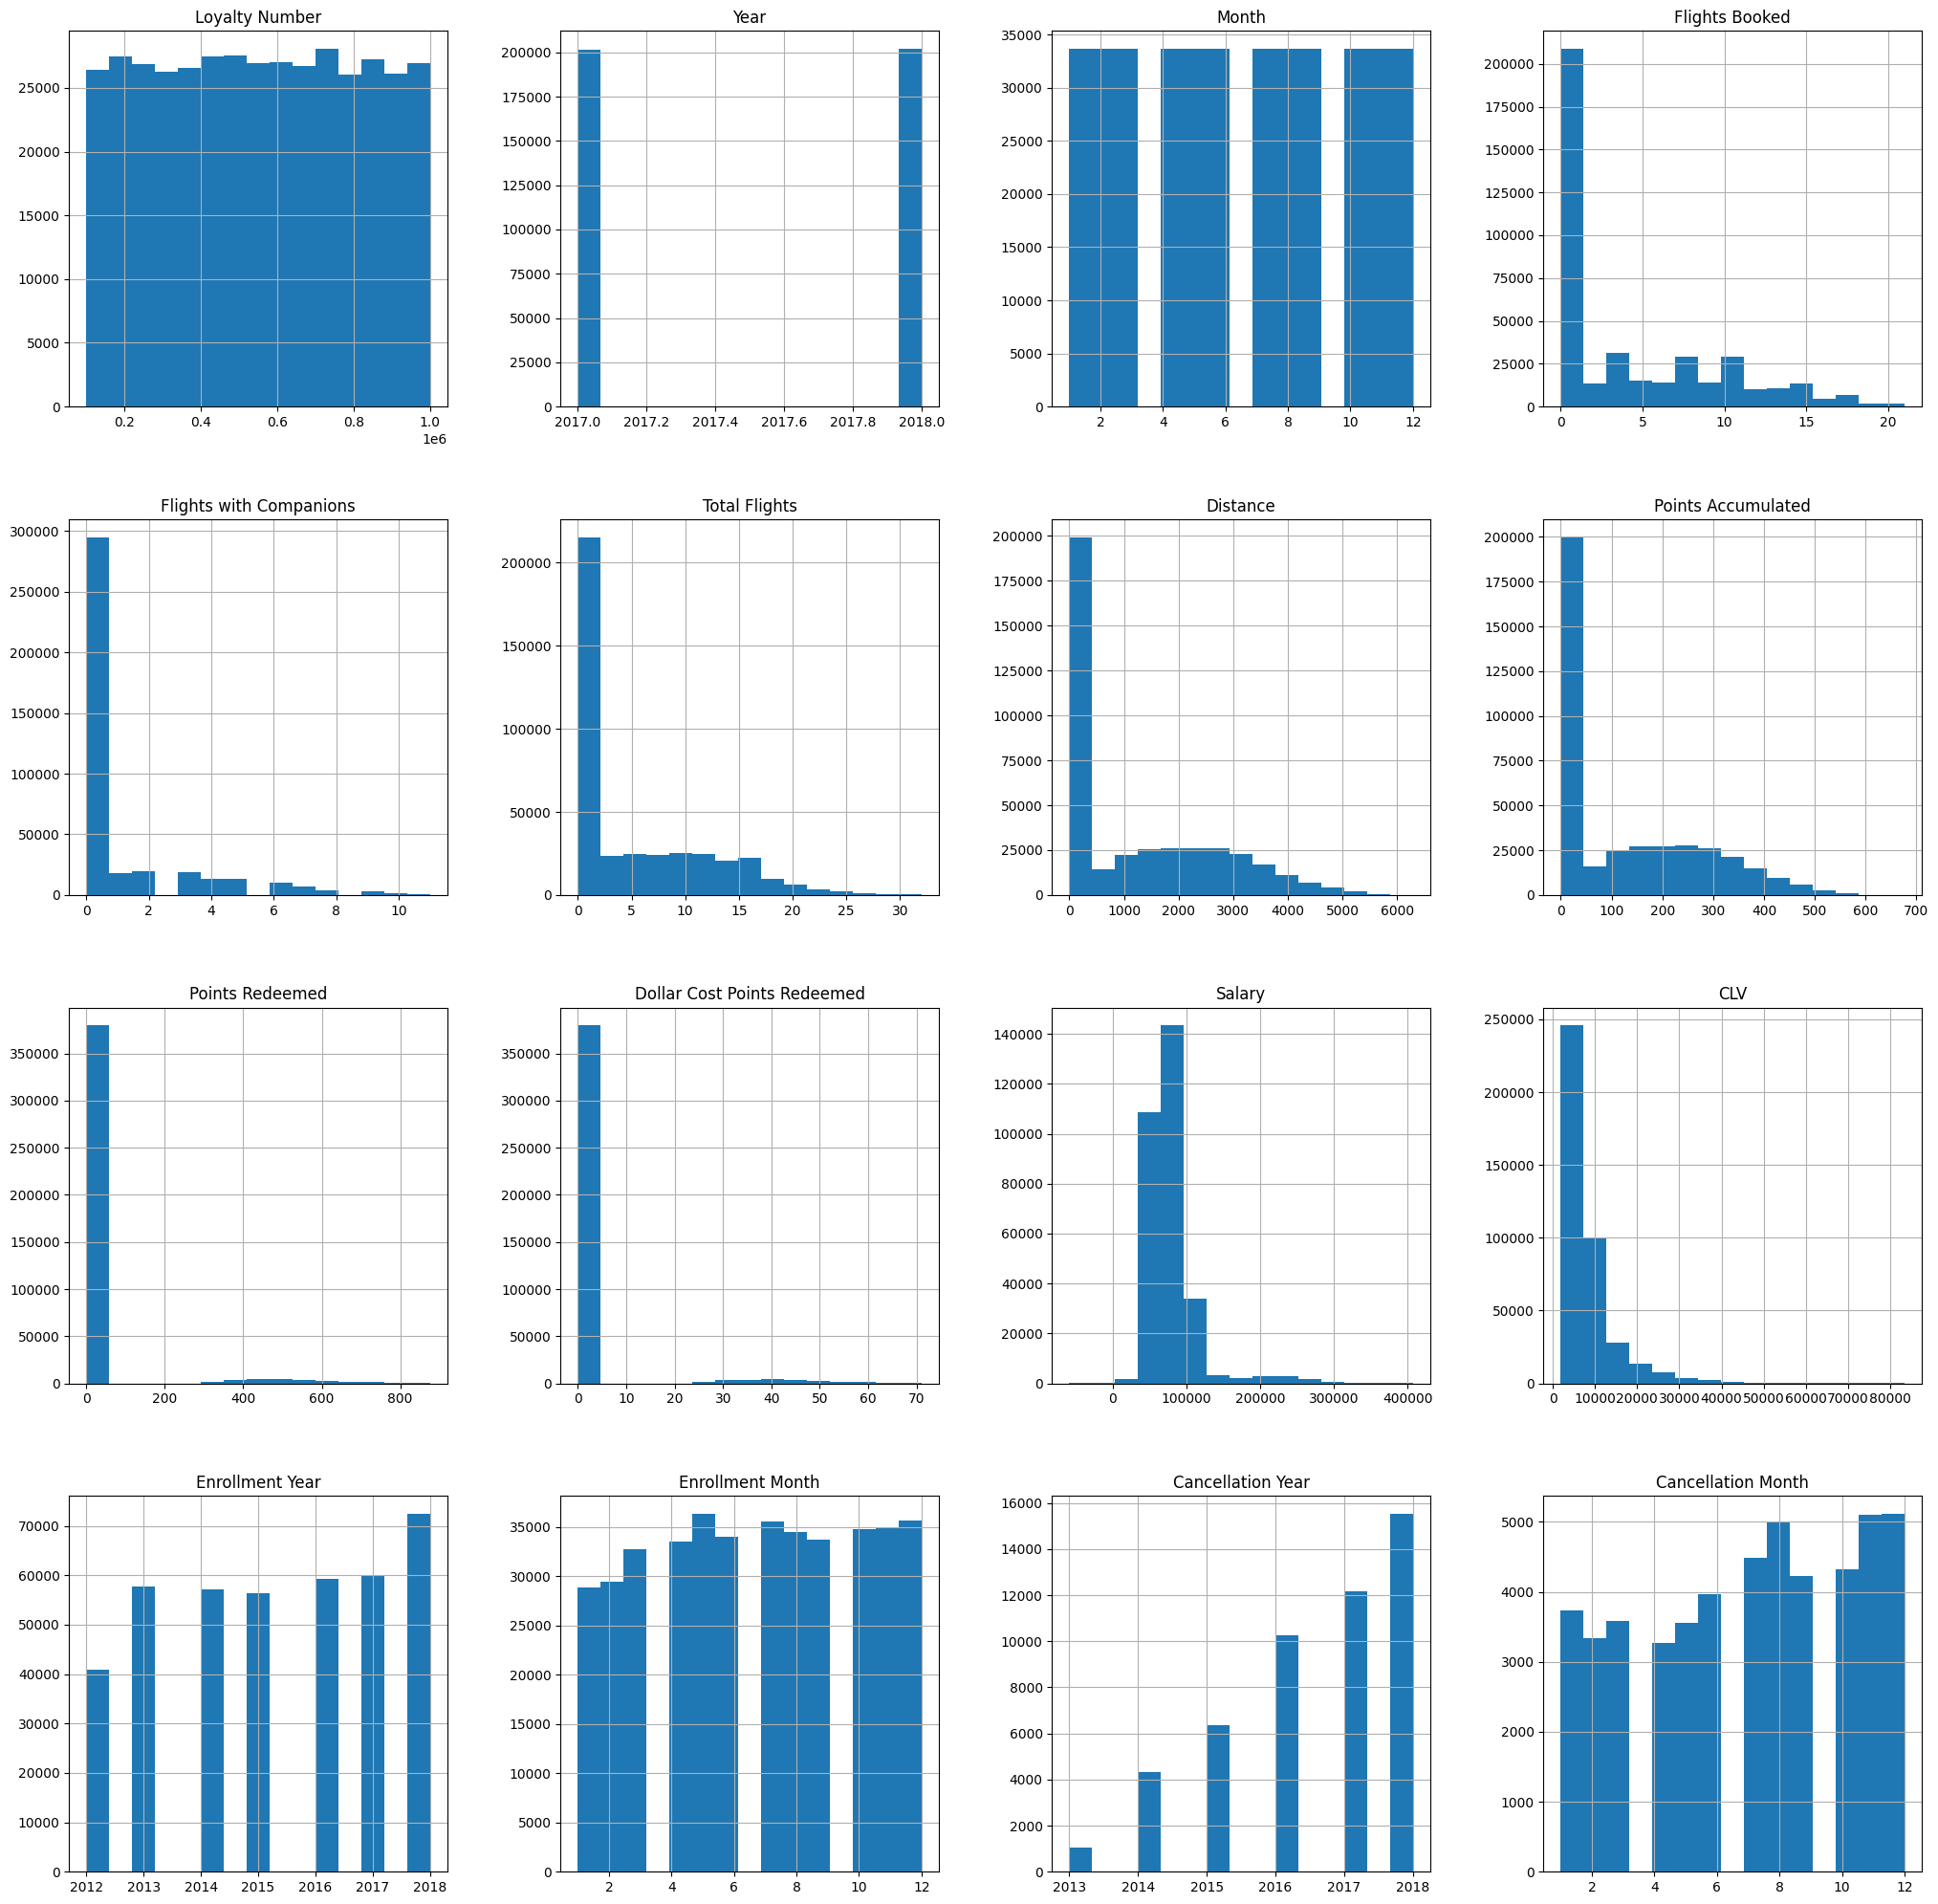

In [29]:
num_bins = 15
df_completo.hist(bins=num_bins, figsize=(25,25))
plt.savefig("histogram_plots")
plt.show()

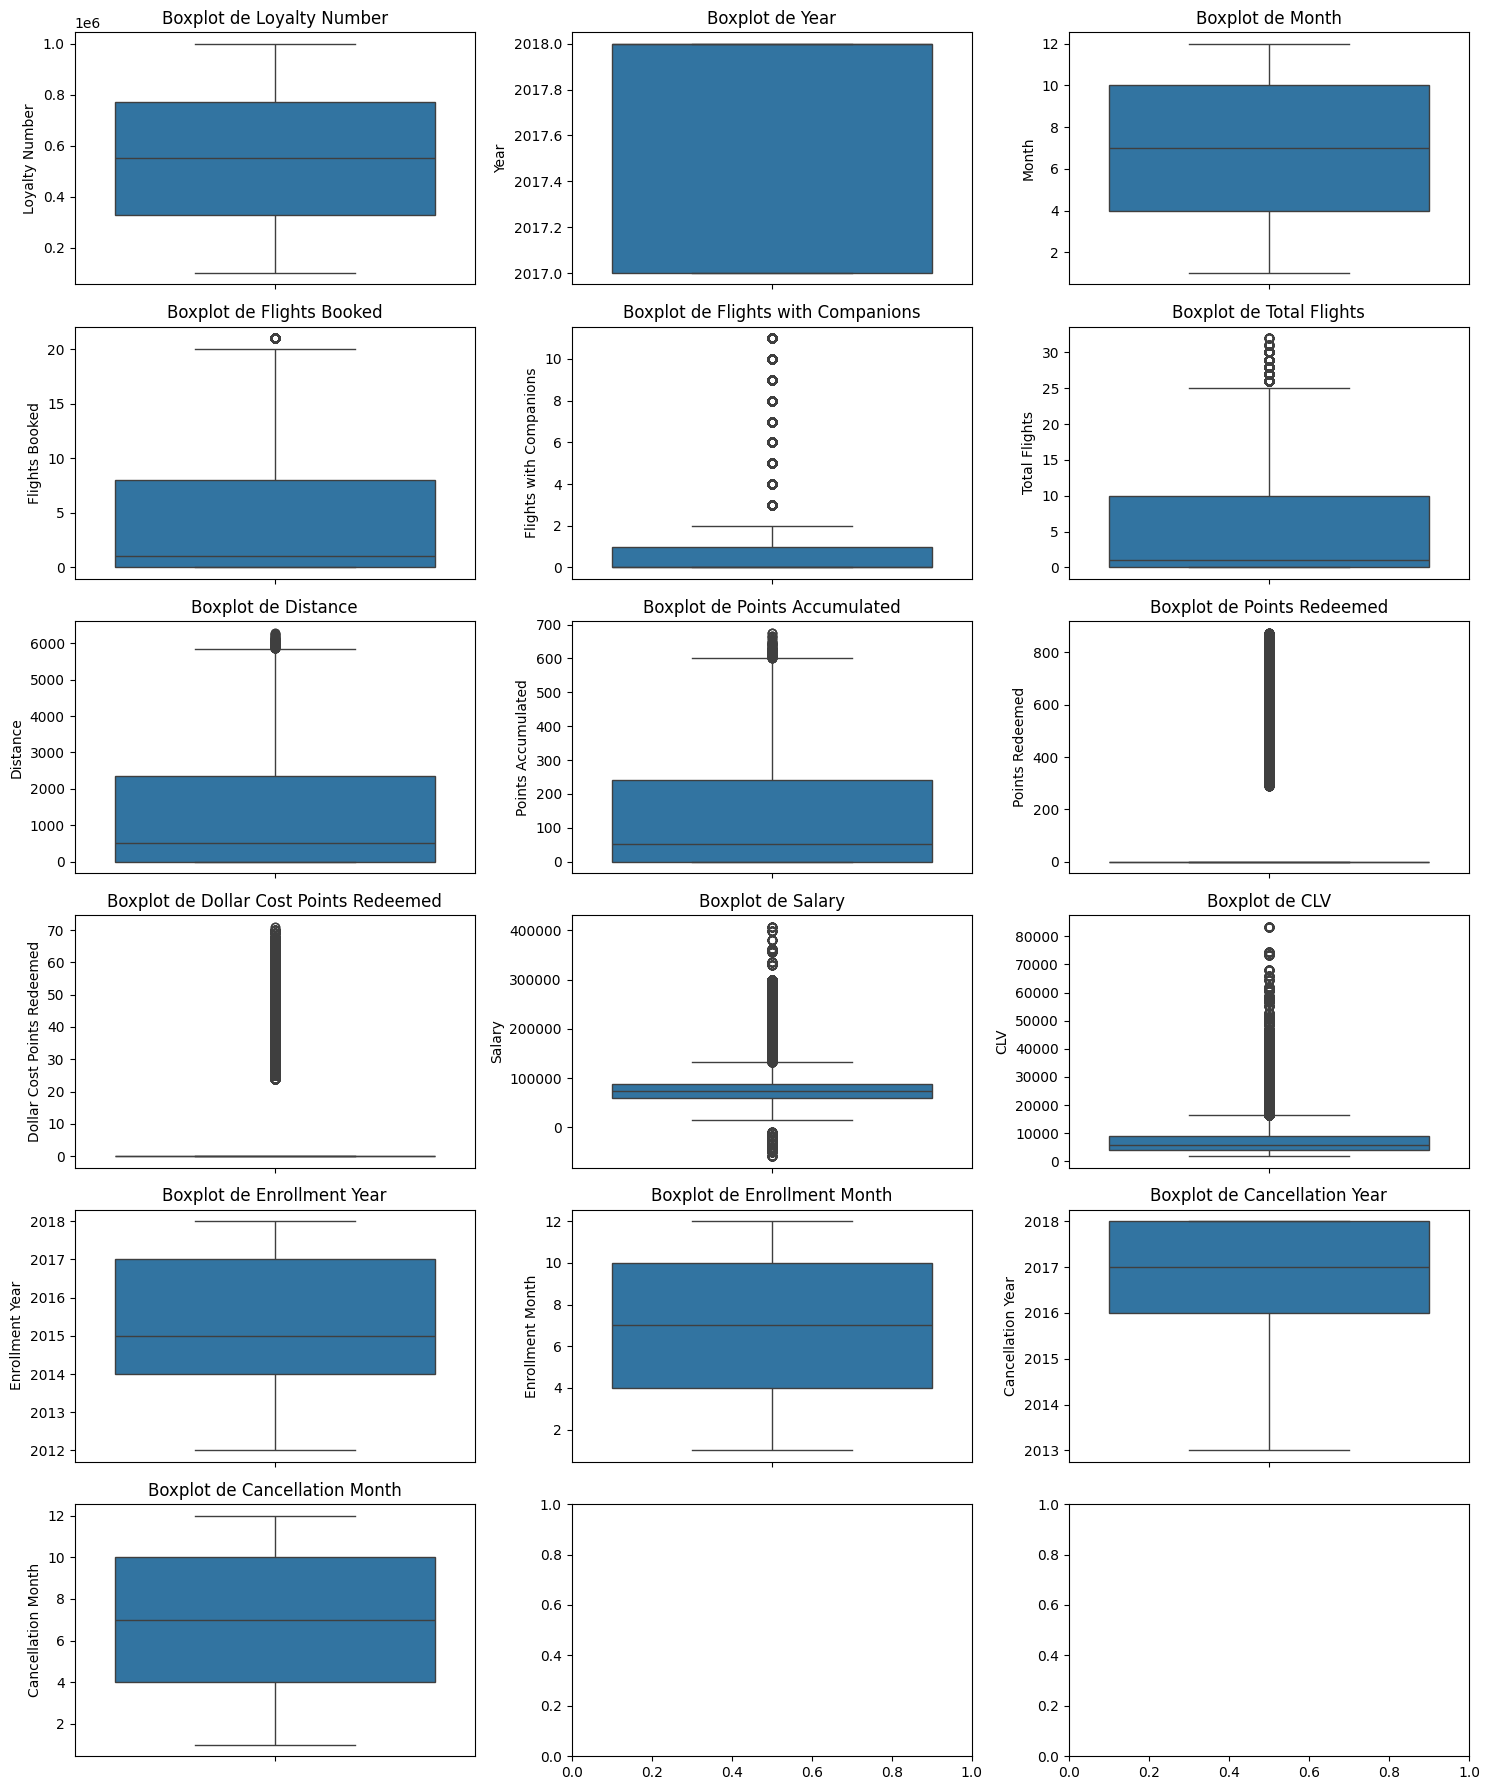

In [30]:
numeric_columns = df_completo.select_dtypes(include=['number']).columns
rows = (len(numeric_columns) // 3) + (len(numeric_columns) % 3 > 0)  # Calcula el número de filas necesarias
cols = 3

# Definir tamaño del gráfico
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows*3))
if rows > 1:
    axes = axes.flatten()
# Iterar sobre cada columna numérica y graficar un boxplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df_completo[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

Limpieza de datos.

In [31]:
df_completo.isnull().sum()/len(df_completo)*100

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.703091
Cancellation Mon

En la fase anterior de exploración de datos habíamos visto salarios negativos. Ante esta situación, se plantean dos opciones: 

1. Asumir que solamente está mal el signo negativo, que la cantidad es correcta y convertirlos a positivo. 
2. Tratarlos como nulos. Quizás sea la opción más segura porque evitamos suposiciones y nuestros datos serán más confiables. 
Otro punto a tener en cuenta es que los datos negativos son 20. Teniendo en cuenta la cantidad de nulos que ya existen, no suponen unha cantidad mucho más elevada de la que ya tenemos. Por estos motivos, nos decidimos por la segunda opción. 

Gestionaremos los nulos de Salary. Para ello, primero asignamos los negativos como nulos. 
Después, utilizaremos Iterative Imputer para imputar los nulos porque la variable cuenta con un alto % de nulos. 

In [32]:
df_completo.loc[df_completo['Salary'] < 0, 'Salary'] = np.nan

Comprobamos que ya no hay ningún salario negativo. 

In [33]:
salarios_negativos = df_completo[df_completo['Salary'] < 0]
salarios_negativos

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [34]:
df_completo.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Flights with Companions,403760.0,1.036569,2.080472,0.00,0.00,0.00,1.00,11.00
Total Flights,403760.0,5.170619,6.526858,0.00,0.00,1.00,10.00,32.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
Points Accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50
Points Redeemed,403760.0,30.838587,125.758002,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.00,0.00,0.00,0.00,71.00


In [35]:
imputer_iter = IterativeImputer(max_iter = 10, random_state = 42)
df_completo['Salary'] = imputer_iter.fit_transform(df_completo[['Salary']])

Comprobamos que ya no hay nulos en Salary.

In [36]:
df_completo.isnull().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                              0
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
dtype: int64

Cambiamos el tipo de las columnas que contienen información de años, pues no las utilizaremos para hacer cálculos. 

In [37]:
df_completo['Cancellation Year'] = df_completo['Cancellation Year'].astype(str)

In [38]:
df_completo['Year'] = df_completo['Year'].astype(str)

In [39]:
df_completo['Enrollment Year'] = df_completo['Enrollment Year'].astype(str)

In [40]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  object 
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

In [41]:
valores_unicos = df_completo['Loyalty Number'].nunique()

print(valores_unicos)

16737


Los meses se indican en números del 1 al 12 y tipo int o float. Vamos a rellenarlos con cada mes correspondiente. 

In [42]:
valores_unicos = df_completo['Month'].unique()

print(valores_unicos)

[ 1  9  2  3 11  4  5  7  6  8 10 12]


In [43]:
meses = {1:"Enero", 2:"Febrero", 3:"Marzo", 4:"Abril", 5:"Mayo", 6:"Junio", 7:"Julio", 8:"Agosto", 9:"Septiembre", 10:"Octubre", 11:"Noviembre", 12:"Diciembre"}
df_completo["Month"] = df_completo["Month"].map(meses)

In [44]:
valores_unicos = df_completo['Month'].unique()

print(valores_unicos)

['Enero' 'Septiembre' 'Febrero' 'Marzo' 'Noviembre' 'Abril' 'Mayo' 'Julio'
 'Junio' 'Agosto' 'Octubre' 'Diciembre']


In [45]:
valores_unicos_em = df_completo['Enrollment Month'].unique()

print(valores_unicos_em)

[ 8  3  7  1  9  5 10  2  4  6 11 12]


In [46]:
meses = {1:"Enero", 2:"Febrero", 3:"Marzo", 4:"Abril", 5:"Mayo", 6:"Junio", 7:"Julio", 8:"Agosto", 9:"Septiembre", 10:"Octubre", 11:"Noviembre", 12:"Diciembre"}
df_completo["Enrollment Month"] = df_completo["Enrollment Month"].map(meses)

In [47]:
valores_unicos_em = df_completo['Enrollment Month'].unique()

print(valores_unicos_em)

['Agosto' 'Marzo' 'Julio' 'Enero' 'Septiembre' 'Mayo' 'Octubre' 'Febrero'
 'Abril' 'Junio' 'Noviembre' 'Diciembre']


In [48]:
valores_unicos_cm = df_completo['Cancellation Month'].unique()

print(valores_unicos_cm)

[nan  3.  9.  2.  7.  6.  8.  4.  1.  5. 11. 12. 10.]


In [49]:
meses = {1:"Enero", 2:"Febrero", 3:"Marzo", 4:"Abril", 5:"Mayo", 6:"Junio", 7:"Julio", 8:"Agosto", 9:"Septiembre", 10:"Octubre", 11:"Noviembre", 12:"Diciembre"}
df_completo["Cancellation Month"] = df_completo["Cancellation Month"].map(meses)

In [50]:
valores_unicos_cm = df_completo['Cancellation Month'].unique()

print(valores_unicos_cm)

[nan 'Marzo' 'Septiembre' 'Febrero' 'Julio' 'Junio' 'Agosto' 'Abril'
 'Enero' 'Mayo' 'Noviembre' 'Diciembre' 'Octubre']


Fase 2. Visualización.

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

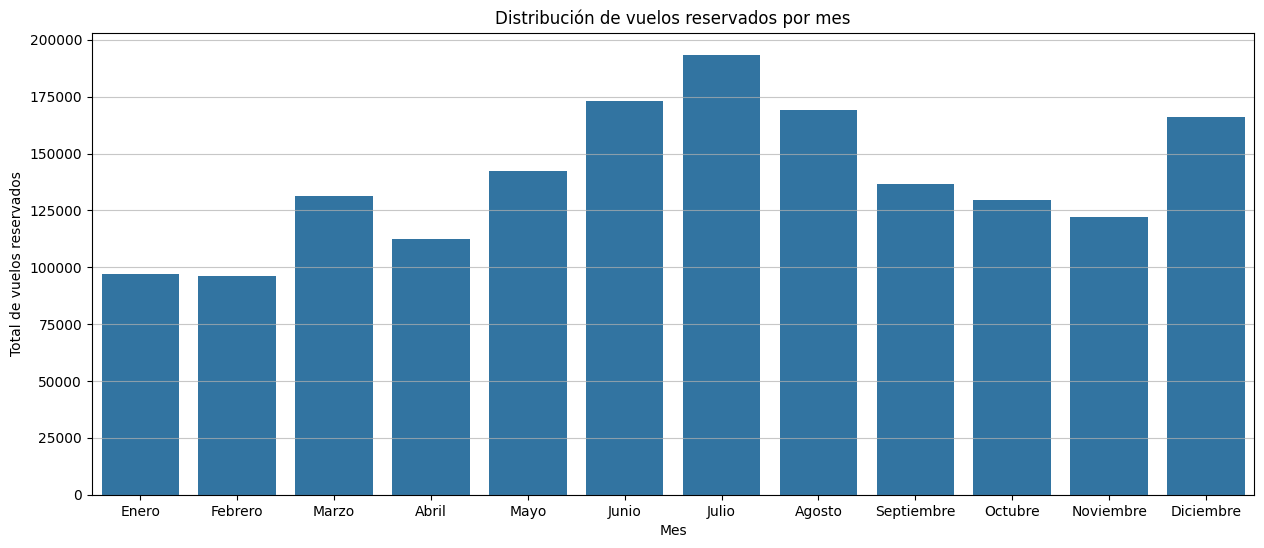

In [51]:
orden_meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", 
               "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
vuelos_mensuales = df_completo.groupby("Month")[["Flights Booked"]].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.barplot(x="Month", y="Flights Booked", data=vuelos_mensuales, order=orden_meses)
plt.xlabel("Mes")
plt.ylabel("Total de vuelos reservados")
plt.title("Distribución de vuelos reservados por mes")
plt.grid(axis="y", alpha=0.7)
plt.show()

El gráfico nos permite ver el total de vuelos reservados a lo largo de los meses del año. Los meses que acumulan más reservas de vuelos son junio, julio, agosto y diciembre. 
Esto parece lógico, puesto que son los meses en los que la población tiende a disfrutar sus vacaciones, de forma generalizada. 

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [52]:
correlacion = df_completo[['Distance', 'Points Accumulated']].corr()
correlacion

,Distance,Points Accumulated
Distance,1.000000,0.994546
Points Accumulated,0.994546,1.000000


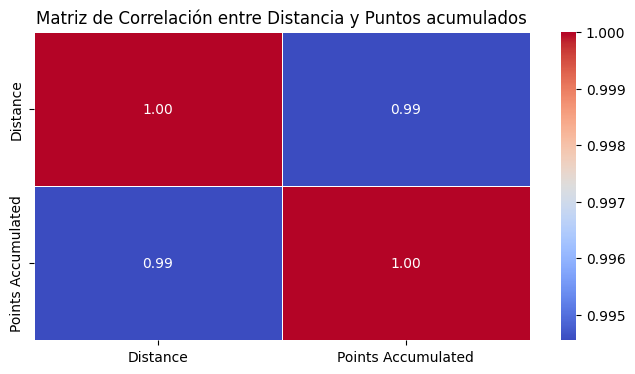

In [53]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Distancia y Puntos acumulados')
plt.show()

La matriz de correlación nos muestra una relación positiva fuerte, por lo que podemos concluír que se trata de una relación positiva clara. 
Esto significa que a medida que aumenta la distancia de los vuelos, aumentan los puntos acumulados. 

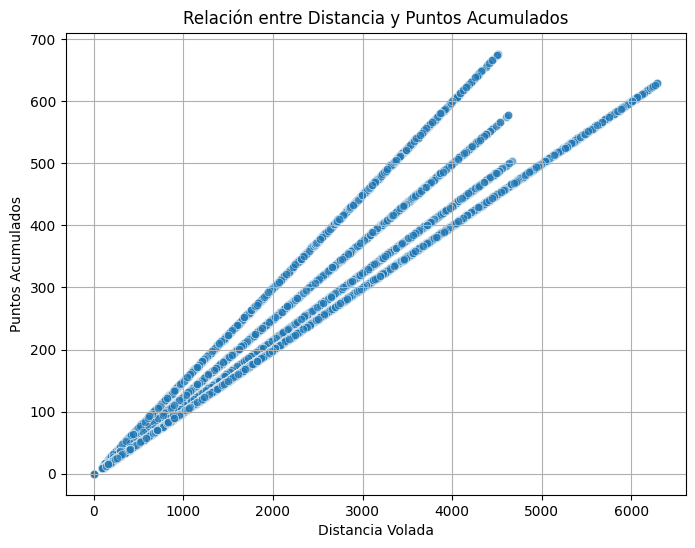

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_completo["Distance"], y=df_completo["Points Accumulated"], alpha=0.6)
plt.xlabel("Distancia Volada")
plt.ylabel("Puntos Acumulados")
plt.title("Relación entre Distancia y Puntos Acumulados")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Relación entre la distancia y los puntos acumulados')

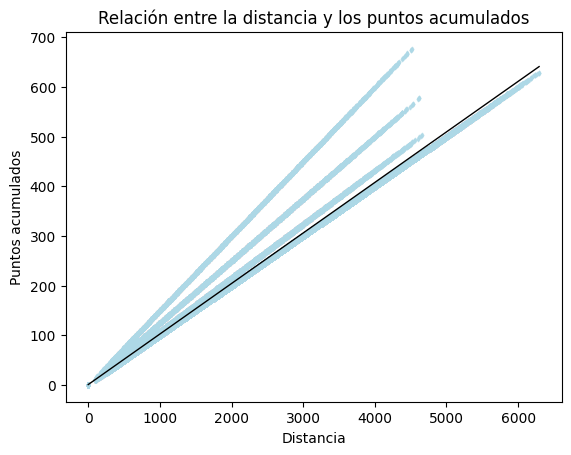

In [55]:
sns.regplot(x = "Distance", 
            y = "Points Accumulated", 
            data = df_completo, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1},
            scatter_kws = {"color": "lightblue", "s": 5}
            )
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre la distancia y los puntos acumulados")

Los dos gráficos anteriores muestran una relación positiva. Además, en el Regplot podemos observar que la línea de regresión nos muestra esta tendencia general entre las variables.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

Teniendo en cuenta que estamos utilizando el dataframe completo, debemos que contar los valores únicos de Loyalty Number, pues cada uno equivale a un cliente. En el df_completo pueden repetirse, pues contiene información de vuelos y puede haber varios registros de un mismo cliente. 

In [56]:
df_clientes_provincia = df_completo.groupby("Province")["Loyalty Number"].nunique().reset_index()
df_clientes_provincia

,Province,Loyalty Number
0,Alberta,969
1,British Columbia,4409
2,Manitoba,658
3,New Brunswick,636
4,Newfoundland,258
5,Nova Scotia,518
6,Ontario,5404
7,Prince Edward Island,66
8,Quebec,3300
9,Saskatchewan,409


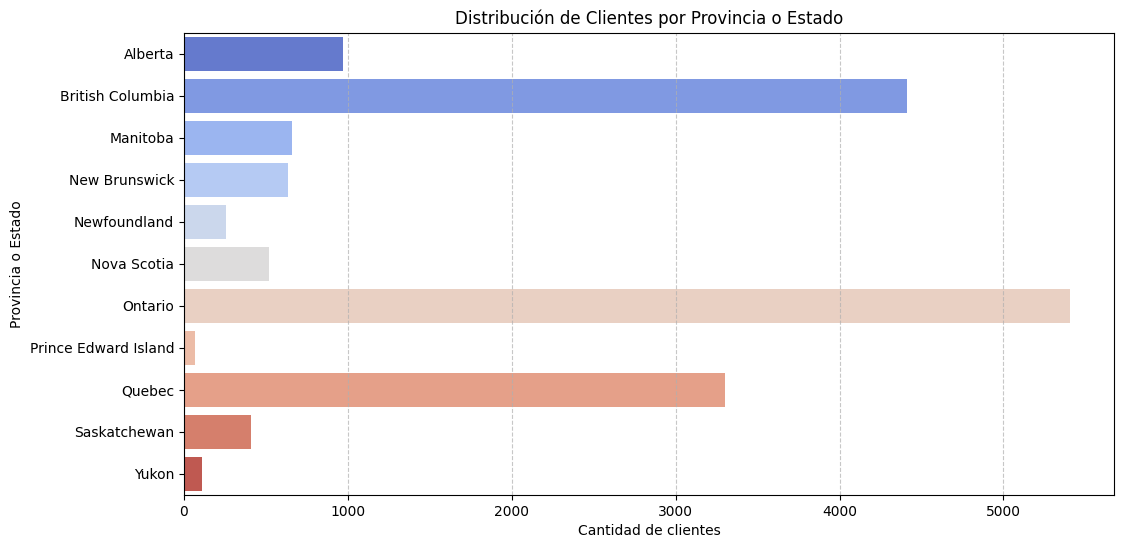

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Loyalty Number", y="Province", data=df_clientes_provincia, palette="coolwarm")

plt.xlabel("Cantidad de clientes")
plt.ylabel("Provincia o Estado")
plt.title("Distribución de Clientes por Provincia o Estado")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

Primero hacemos un dataframe que agrupe a los clientes (valores únicos) por los distintos niveles de educación y salario.

In [58]:
df_sal_educ = df_completo.groupby("Education").agg({
    "Loyalty Number": "nunique",
    "Salary": "mean"}).reset_index()
df_sal_educ

,Education,Loyalty Number,Salary
0,Bachelor,10475,72679.704838
1,College,4238,79441.628829
2,Doctor,734,178403.675202
3,High School or Below,782,61183.950415
4,Master,508,103734.523724


Utilizamos el gráfico barplot, que nos mostrará la media de la variable Salary para los distintos niveles educativos. 

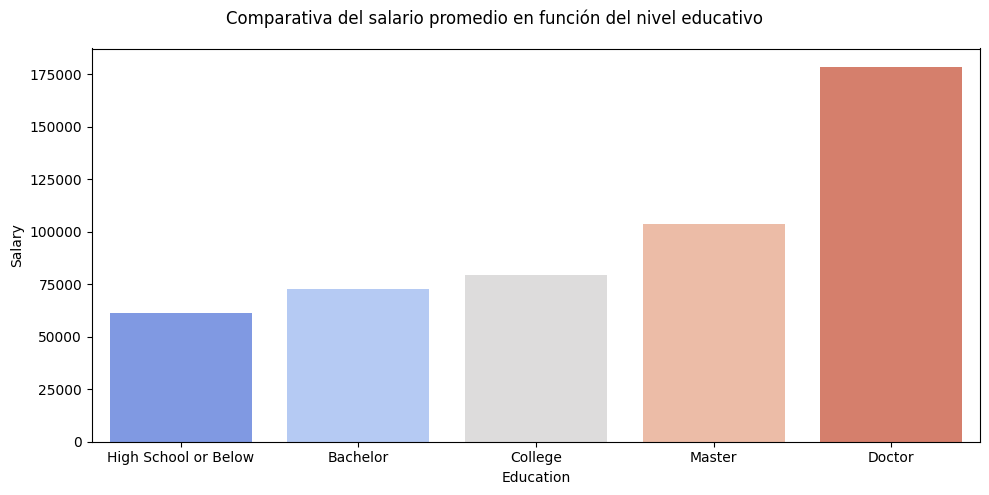

In [59]:
orden_education = ["High School or Below", "Bachelor", "College", "Master", "Doctor"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "Education", 
            y = "Salary", 
            data = df_sal_educ,
            ci = None,
            palette = "coolwarm",
            order = orden_education)
plt.suptitle("Comparativa del salario promedio en función del nivel educativo")
plt.tight_layout()


El resultado de la comparativa nos indica que los clientes con un mayor nivel educativo cuentan con un salario medio más alto. 

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [60]:
df_loyalty_card = df_completo.groupby("Loyalty Card")["Loyalty Number"].nunique().reset_index()
df_loyalty_card

,Loyalty Card,Loyalty Number
0,Aurora,3429
1,Nova,5671
2,Star,7637


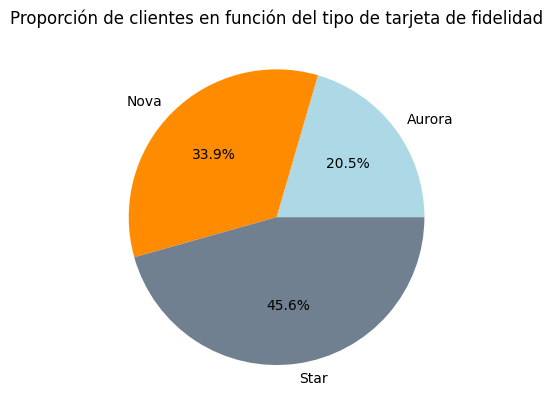

In [61]:
colores = ["lightblue", "darkorange", "slategray"]
plt.pie("Loyalty Number", labels= "Loyalty Card",
        data = df_loyalty_card,
        autopct=  '%1.1f%%',
        colors=colores);
plt.title("Proporción de clientes en función del tipo de tarjeta de fidelidad")
plt.show()

El gráfico pieplot nos indica que un 45,6% de los clientes cuentan con una tarjeta de fidelidad Star, un 33,9% disponen de una tarjeta de fidelidad Nova y el resto (20,5%) de una tarjeta Aurora. 

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [62]:
df_distribucion_ec_sexo = df_completo.groupby(["Marital Status", "Gender"])["Loyalty Number"].nunique().reset_index()
df_distribucion_ec_sexo

,Marital Status,Gender,Loyalty Number
0,Divorced,Female,1269
1,Divorced,Male,1249
2,Married,Female,4869
3,Married,Male,4866
4,Single,Female,2272
5,Single,Male,2212


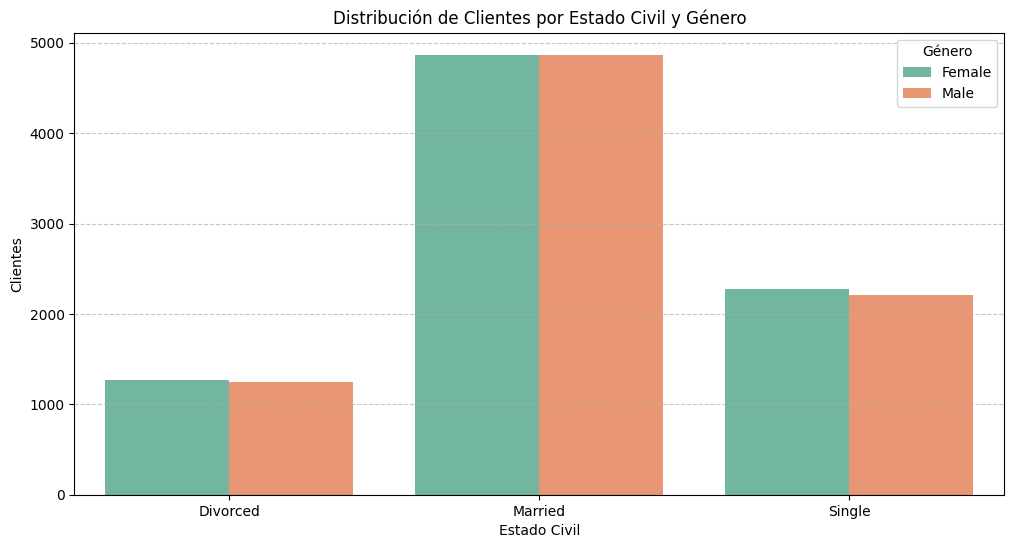

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Marital Status", y="Loyalty Number", hue="Gender", data=df_distribucion_ec_sexo, palette="Set2")
plt.xlabel("Estado Civil")
plt.ylabel("Clientes")
plt.title("Distribución de Clientes por Estado Civil y Género")
plt.legend(title="Género")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

Tanto los hombres como las mujeres siguen una distribución muy similar, encontrándose la mayoría, casados/as. 

Fase 3. Evaluación de diferencias en reservas de vuelos por nivel educativo. 

1. Preparación de datos: filtra el conjunto de datos para incluir únicamente las columnas relevantes: "Flights Booked" y "Education". 

In [64]:
df_fase_3_= df_completo.loc[:, ["Flights Booked", "Education"]]
df_fase_3_

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
...,...,...
403755,0,College
403756,0,Doctor
403757,3,Bachelor
403758,0,College


2. Análisis descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.

In [65]:
df_vuelos_education= df_fase_3_.groupby(["Education"])["Flights Booked"].describe().reset_index()
df_vuelos_education

,Education,count,mean,std,min,25%,50%,75%,max
0,Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
1,College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
2,Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
3,High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
4,Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

Se establecen dos niveles educativos: sin estudios universitarios y con estudios universitarios. 

Hipótesis

Hipótesis nula (H₀): No hay diferencia significativa en los vuelos reservados entre los diferentes niveles educativos (con o sin estudios universitarios).

Hipótesis alternativa (H₁): Hay una diferencia significativa en los vuelos reservados entre los niveles educativos (con o sin estudios universitarios).

In [66]:
def prueba_hipotesis(*args):
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U (prueba no paramétrica)"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0 (Diferencias significativas)" if p_valor < alfa else "No se rechaza H0 (No hay diferencias significativas)"
    }

    # Imprimir resultados
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

    return resultado

In [67]:
df_fase_3_["Niveles"] = np.where(df_fase_3_["Education"] == "High School or Below", "sin estudios universitarios", "con estudios universitarios")
df_ceu = df_fase_3_[df_fase_3_["Niveles"] == "con estudios universitarios"]["Flights Booked"]
df_seu = df_fase_3_[df_fase_3_["Niveles"] == "sin estudios universitarios"]["Flights Booked"]

prueba_hipotesis(df_seu, df_ceu)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.3711)
✅ Test aplicado: Mann-Whitney U (prueba no paramétrica)
📉 Estadístico: 3662315600.0000, p-valor: 0.1240
🔍 Conclusión: No se rechaza H0 (No hay diferencias significativas)



{'Test de Normalidad': [np.False_, np.False_],
 'Datos Normales': False,
 'p-valor Varianza': np.float64(0.37108891330451155),
 'Varianzas Iguales': np.True_,
 'Test Usado': 'Mann-Whitney U (prueba no paramétrica)',
 'Estadístico': np.float64(3662315600.0),
 'p-valor': np.float64(0.12400336700423258),
 'Conclusión': 'No se rechaza H0 (No hay diferencias significativas)'}

No podemos rechazar la hipótesis nula. No hay una diferencia significativa en los vuelos reservados entre los dos grupos (sin estudios universitarios y con estudios universitarios).